## Machine Learning Pipeline - Session 2

CRISP - DM: Cross Industry Standard Process for Data Mining 

Business Understanding - Data Understanding  - Data Preparation - Modeling (Assumptions about the data, convert the data into training and testing data) - Evaluation (How good the model is based on the test data and various parameters to understand the additional business understanding. This iteration is continued to the point till no further improvement can be implemented) - Deployment (The model is finally deployed).

For standard machine learning pipeline:

Identify the data - Data retrieval - data preparation (using data wrangling) - modeling (Choose a ML model) - Model evaluation - Deployment and machining

### Collect the Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sal = pd.read_csv('SalaryData.csv')

In [3]:
sal

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


### Pre-process the data

Let the regression line be:

1. y = b0 + b1.X, where y is the salary and X is the experience.
2. y = b0.1 + b1.X
3. y = [b0 b1] [1 X] ^ T

In [7]:
# Adding constant 1 to each data point as a column vector

import statsmodels.api as sm

In [10]:
y = sal['Salary']
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [11]:
X = sm.add_constant(sal['YearsExperience'])
X

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2
5,1.0,2.9
6,1.0,3.0
7,1.0,3.2
8,1.0,3.2
9,1.0,3.7


### Divide the data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 2), (6, 2), (24,), (6,))

In [14]:
X_train

,const,YearsExperience
13,1.0,4.1
27,1.0,9.6
12,1.0,4.0
1,1.0,1.3
19,1.0,6.0
14,1.0,4.5
18,1.0,5.9
6,1.0,3.0
11,1.0,4.0
23,1.0,8.2


In [15]:
X_test

,const,YearsExperience
20,1.0,6.8
7,1.0,3.2
5,1.0,2.9
2,1.0,1.5
3,1.0,2.0
21,1.0,7.1


In [16]:
y_train

13     57081
27    112635
12     56957
1      46205
19     93940
14     61111
18     81363
6      60150
11     55794
23    113812
24    109431
28    122391
22    101302
10     63218
26    116969
29    121872
8      64445
25    105582
16     66029
17     83088
0      39343
15     67938
4      39891
9      57189
Name: Salary, dtype: int64

In [17]:
y_test

20    91738
7     54445
5     56642
2     37731
3     43525
21    98273
Name: Salary, dtype: int64

### Perform Data Exploration

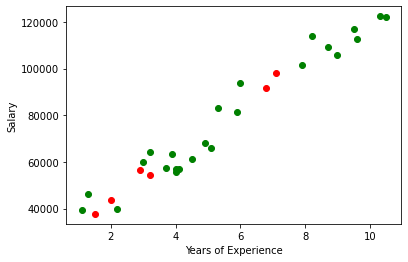

In [19]:
# Visualization
plt.scatter(X_train['YearsExperience'],y_train, c = 'green');
plt.scatter(X_test['YearsExperience'],y_test, c = 'red');
plt.xlabel('Years of Experience');
plt.ylabel('Salary');

### Model Building

Model Building is conducted using OLS (Ordinary Least Square). This is the best method to ascertain the Linear Regression Line. A perfect Linear Regression model is achieved when y = b0 + b1. X. However, we have an error (difference between the actual value and the predicted value) and hence the corrected equation becomes, yi = b0 + bi. Xi + Ei (Ei = Error)

Ei = yi - (b0 + bi. Xi)

Ei ^ 2 = [yi - (b0 + bi. Xi)]^2 (SSE = Sum of Squares of Error).

Minimize the Ei.In order to minimize the Ei, we need to find the value of b0 and b1. The values of the same can be found mathematically using partially derivative.

In [20]:
sal_lr = sm.OLS(y_train, X_train)

### Assumptions of the Linear Regression Model

1. The errors or residuals Ei are assumed to be following a normal distributed with expected value = 0 (Standard Normal Distr).
2. The variance of error, VAR(Ei) is constant for various values of independent variable X. This is known as homoscedastisity. When the variance of error is not constant, it is called heteroscedastisity.
3. The error and the independent variable are uncorrelated.
4. The functional relationsip between the outcome variable and feature is correctly defined.

### Fitting the model

In [21]:
sal_lr

In [22]:
sal_lr = sal_lr.fit()

In [23]:
sal_lr

In [25]:
# Getting the parameters

sal_lr.params, # b0 = 26089.096632 and b1 = 9356.862994

(const              26089.096632
 YearsExperience     9356.862994
 dtype: float64,)

### Model Diagnosis

In [26]:
sal_lr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.947     
Dependent Variable:   Salary             AIC:                  490.1973  
Date:                 2022-10-03 11:11   BIC:                  492.5534  
No. Observations:     24                 Log-Likelihood:       -243.10   
Df Model:             1                  F-statistic:          413.4     
Df Residuals:         22                 Prob (F-statistic):   9.45e-16  
R-squared:            0.949              Scale:                4.0119e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           26089.0966 2909.0925  8.9681 0.0000 20056.0080 32122.1852
YearsExperience  9356.8630  460.2197 20.3313 0.0000  8402.4258 10311.3002
-------------------------------------------------------------------------
Omnibus:                  2.696          Durbin-Watson:             2.218
Prob(Omnibus):            0.260          Jarque-Bera (JB):          1.670
Skew:                     0.402          Prob(JB):                  0.434
Kurtosis:                 1.989          Condition No.:             15   
=========================================================================

"""

R-squared is called the coefficient of determination. It explains the confidence that the changes in the value of y is correctly reflected by the Linear Regression Line. Df means degrees of freedom.

Ideally, the Coefficient of Determination lies between 0 and 1, and should be close to 1.

Yi (Variation in Y) = (b0 + bi.Xi) [Variation which is explained] + Ei (Variation unexplained).

In the above table, identify the level of significance (P value) which is less than 0.05, to show the variables are inter-dependent.

### Checking for normal distribution of residuals

In [27]:
# Calculating the residuals

sal_lr.resid # This gives the residual

13    -7371.234906
27    -3279.981370
12    -6559.548607
1      7951.981476
19    11709.725406
14    -7083.980103
18       68.411706
6      5990.314387
11    -7722.548607
23    10996.626821
24     1937.195324
28      -73.785466
22     1293.685719
10      637.137693
26     1989.704929
29    -2464.158065
8      8413.941788
25    -4718.863574
16    -7780.097899
17     7407.529502
0      2961.354075
15    -3999.725301
4     -6783.195218
9     -3520.489709
dtype: float64

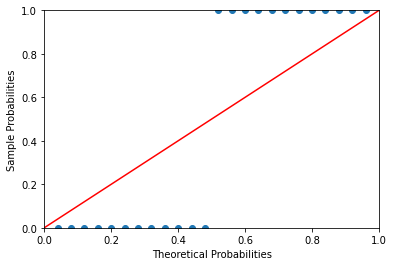

In [29]:
# Using the probability - probaility plot

probplot = sm.ProbPlot(sal_lr.resid)
probplot.ppplot(line = '45')
plt.show();

### Test of homoscedasticity

In [30]:
def standardisation (vals):
    return (vals - vals.mean()) / vals.std()

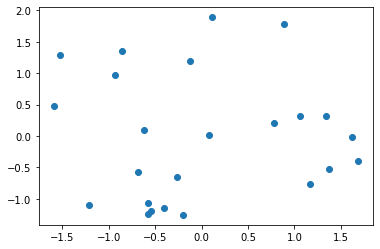

In [33]:
# Plotting the residual plot

plt.scatter(standardisation(sal_lr.fittedvalues),standardisation(sal_lr.resid))
plt.show(); # it shows that there is no common relation between the residue and the X values.